Title: Multithreading
Slug: multithreading
Summary: Multithreading to perform two or more Python operations at the same time
Date: 2018-04-23 15:00  
Category: Python 
Subcategory: Intermediate Concepts
Tags: multithreading
Keywords: multithreading tutorial python
Authors: Dan Friedman

### Why is Performant Code Important

In analyzing data, you may be dealing with thousands, millions or even billions of records. As you perform computations to gain insights, you'll likely do lots of data transformations.

With each computation, to save even seconds or minutes can be greatly helpful for you to deliver insights to your team faster and ultimately get more work done over time.

With parallelism in Python, you can do just that.

### Brief Overview

**Parallelism** is when two or more tasks run *at the same time*. There's important terminology to understand regarding parallelism too.

A **thread** is an execution context for code.

A **process** is a program and state of all threads executing in a program.

One process can have several threads running *at the same time*. One program could also have several proccess running *at the same time*.

In Python, by default programs run as a single process with a single thread of execution; this uses just a single CPU. 

My Apple MacBook Pro has 4 CPU cores.

When I run a Python program on my computer, 3 CPU cores, equivalent to 75% of my computer's *power*, sits idle.

For parallelism to work, a computer must use multiple threads each running on its own core *at the same time*.

Examples of parallelism can help with:
- executing database queries
- pre-processing lots of images to use for machine learning
- web crawling 

This tutorial uses a few simple practical examples to illustrate parallelism through **multithreading** - using multiple threads. We'll compare runtimes that generates the same output using multithreading versus a tranditional Python program with no threading.

### `map` Function and Example

The use of `map` will be applied in our multithreading example later; so I'll provide a brief introduction now.

Below I wrote a function called `number_times_two` to take in a number, multiply it by two and return the result.

`map` is a built-in Python function that helps us easily apply a function over every item in an iterable such as a list. 

We'll use the `map` function to apply `number_times_two` to every element in the list of numbers `[1, 2, 3, 4]`.

This table illustrates the operations that will take place.

Input | `number_times_two` Operation | Result
--- | --- | ---
1 | 1*2 | 2
2 | 2*2 | 4
3 | 3*2 | 6
4 | 4*2 | 8




In [163]:
def number_times_two(number):
    """
    Multiply a number by 2
    
    :param number: a value we'll use in our computation
    :type number: (preferably an) int
    
    :returns: number*2
    """
    return number*2

In [164]:
type(number_times_two)

function

The `map` function returns an *map object* that is an *iterator*.

In [165]:
map(number_times_two, [1, 2, 3, 4])

We can call the built-in `list` function to output our result, the *map* object, as a list.

In [166]:
list(map(number_times_two, [1, 2, 3, 4]))

[2, 4, 6, 8]

### Parallelism

#### Import Modules

In [167]:
from requests import get
from multiprocessing.dummy import Pool as ThreadPool 
import matplotlib.pyplot as plt
from time import time
from concurrent.futures import ThreadPoolExecutor
import numpy as np
%matplotlib inline

#### Helper Functions

These functions below will help us visually illustrate the effect of multithreading so it's easier to understand.

In [168]:
def multithreading(function, iterable, number_of_threads):
    """
    Maps a function across an iterable (such as a list of elements) with the optional use of multithreading.
    
    :param function: name of a function
    :type function: function
    
    :param iterable: elements used as inputs to function parameter
    :type iterable: list
    
    :param number_of_threads: number of threads to use in map operation
    :type number_of_threads: int
    
    :returns list_objects: return objects from our function parameter calls
    :return type: list
    """    
    with ThreadPoolExecutor(max_workers=number_of_threads) as executor:
        responses = executor.map(function, iterable)
    list_responses = list(responses)
    return list_responses

In [169]:
def transform_timestamps_to_be_seconds_from_process_start_time(process_start_time, all_task_timestamps):
    """
    Take list of start and end timestamps of # of seconds since epoch, and subtract the process start time from them all
    
    Therefore we'll know how far timestamps are from the 0th second, the start of the program.
    
    :param process_start_time: # of seconds since epoch for start of task
    :type process_start_time: float
    
    :param all_task_timestamps: # of seconds since epoch for end of task
    :type all_task_timestamps: list
    
    :return function_timestamps_starting_from_zero: same shape as all_task_timestamps but all values subtracted by process_start_time
    :type function_timestamps_starting_from_zero: list
    """
    function_timestamps_starting_from_zero = []
    for task_times in all_task_timestamps:
        start_and_stop_times = []
        for each_time in task_times:
            new_time = each_time - process_start_time
            start_and_stop_times.append(new_time)
        function_timestamps_starting_from_zero.append(start_and_stop_times)
    return function_timestamps_starting_from_zero

In [170]:
def separate_list_elements(list_of_lists):
    """
    Given a list structure such as [[x, y], [x, y]] return a list of just the x's and another of just y's
    
    :param list_of_lists: list with nested lists
    :type list_of_list: list
    
    :return start_values, end_values: two lists - one of all 0-th index values and another of 1st index values in each nested list
    :return type: tuple storing two lists
    """
    start_values = [inner_list[0] for inner_list in list_of_lists]
    start_values = np.array(start_values)
    
    end_values = [inner_list[1] for inner_list in list_of_lists]
    end_values = np.array(end_values)
    return start_values, end_values

In [171]:
def bar_colors_based_on_threads(number_of_threads):
    """
    Make a list of colors the same length as the number_of_threads
    
    :param number_of_threads: number of threads used in multithreading operation
    :type number_of_threads: int
    
    :return colors: list of colors chosen from good_colors
    :type colors: list
    """
    good_colors = ['firebrick', 'darkgreen', 'royalblue', 'rebeccapurple']
    colors = sample(good_colors, number_of_threads)
    return colors

In [192]:
def visualize_task_times(start_times, end_times, plot_title, colors):
    """
    Use Matplotlib module to create a horizontal bar chart of the time elapsed for each multithreading task.
    
    :param start_times: start times of tasks
    :type start_times: list
    
    :param end_times: end times of tasks
    :type end_times: list
    
    :param plot_title: title of plot
    :type plot_title: string
    
    :param colors: colors of bars
    :type colors: list
    
    :return: None
    """
    plt.barh(range(len(start_times)), end_times-start_times, left=start_times, color=colors);
    plt.grid(axis='x');
    plt.ylabel("Tasks");
    plt.xlabel("Seconds");
    plt.title(plot_title);
    plt.figure(figsize=(12, 10));
    plt.show();
    return None;

In [193]:
def visualize_multithreading_effect(number_of_threads, function_name, iterable, plot_title):
    """
    Perform multithreading given a function_name and number_of_threads and visualize tasks as bar chart
    
    :param number_of_threads: number of threads used in multithreading
    :type number_of_threads: int
    
    :param function_name: name of function applied in multithreading operation
    :type function_name: function
    
    :param iterable: elements used as inputs to function parameter
    :type iterable: list
    
    :param plot_title: title of plot
    :type plot_title: string
    
    :return: None
    """
    process_start_time = time() # we track time here 
    time_logs_multhreading_op = multithreading(function_name, iterable, number_of_threads)
    multithreading_task_timestamps = transform_timestamps_to_be_seconds_from_process_start_time(process_start_time, time_logs_multhreading_op)
    start_times, end_times = separate_list_elements(multithreading_task_timestamps)
    colors = bar_colors_based_on_threads(number_of_threads)
    visualize_task_times(start_times, end_times, plot_title, colors)

### Measure Server Response Times

This is a popular example on the web. For a long list of URLs, we'll use the `requests` module to `get` a *response object*. 

With this *response object*, we could later perform operations to see the status of the request, get the contents of the site and more!

In [194]:
twelve_urls = ['https://secure.capitalbikeshare.com/map/']*12

In [195]:
def get_response_time_measurements(url):
    """
    mark start time, then call the get method and pass in a url to receive a server response object, then mark end time
    
    :param url: address of a worldwide web page 
    :type url: string
    
    :returns: start_time and stop_time of this task
    :type returns: list
    """
    start_time = time()
    try:
        response = get(url)
    except Exception as exception_object:
        print('Error with request for url: {0}'.format(url))
    stop_time = time()
    return [start_time, stop_time]

First, just to illustrate our `multithreading` function, I'll call the `multithreading` function relevant to this example.

We'll be return a list of nested lists, in which each nested list will contain the start timestamp and end timestamp of each task - each task being getting a new server response.

In [196]:
multithreading(function=get_response_time_measurements, iterable=twelve_urls, number_of_threads=1)

[[1524543670.5281558, 1524543671.434155],
 [1524543671.434238, 1524543672.322919],
 [1524543672.322981, 1524543673.379513],
 [1524543673.379573, 1524543674.401994],
 [1524543674.402056, 1524543675.429127],
 [1524543675.429194, 1524543676.4515998],
 [1524543676.451665, 1524543677.473718],
 [1524543677.473791, 1524543678.505676],
 [1524543678.505737, 1524543679.520997],
 [1524543679.521058, 1524543680.545258],
 [1524543680.545326, 1524543681.569432],
 [1524543681.569493, 1524543682.422249]]

#### Multithreading with 1 Thread

In the visualizations below, each color represents the use of one thread in the operations. 

So for multithreading with two threads, you'll see two color bars, one for each thread.

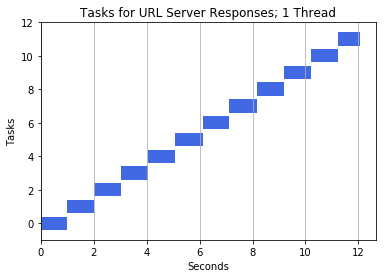

In [197]:
visualize_multithreading_effect(number_of_threads=1,
                                function_name=get_response_time_measurements,
                                iterable=twelve_urls,
                                plot_title="Tasks for URL Server Responses; 1 Thread")

#### Multithreading with 2 Threads

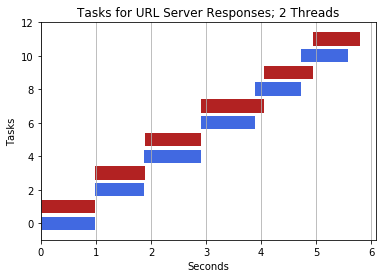

In [198]:
visualize_multithreading_effect(number_of_threads=2,
                                function_name=get_response_time_measurements,
                                iterable=twelve_urls,
                                plot_title="Tasks for URL Server Responses; 2 Threads")

Let's visualize the effect of multithreading with 4 threads.

#### Multithreading with 4 Threads

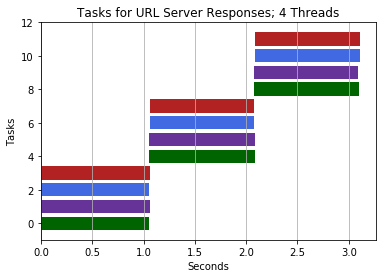

In [199]:
visualize_multithreading_effect(number_of_threads=4,
                                function_name=get_response_time_measurements,
                                iterable=twelve_urls,
                                plot_title="Tasks for URL Server Responses; 4 Threads")

#### Single Thread

Now, let's perform the same operation **without** the overhead of setting up multithreading.

In [180]:
%%time

# traditional python program without multithreading
task_timestamps = list(map(get_response_time_measurements, different_urls));

CPU times: user 301 ms, sys: 16.7 ms, total: 318 ms
Wall time: 12.1 s


**Conclusion:** the process completed much quicker with multithreading compared to no threading; shortest runtime with 4 threads was ~3.25 seconds.

The reason threading is much faster here is because the processor isn't working very hard to retreive the contents on the sites; however, the bottleneck is waiting for the site's server response to our HTTP request - an external resource. While one thread is performing a task of getting/waiting for a server response for one URL, another thread can be doing the same task for another URL.

This is why threading can provide a large speed increase. The processor can switch between the threads whenever one of them is ready to do some work. 

### Example: Squares of Numbers

Given this big list of numbers in `big_list`, we want to output a new list that has the square of all numbers in `big_list`.

In [181]:
big_list = range(1, 12000000)

In [182]:
def square_value(x):
    return x**2

#### Multithreading

Below I utilize code from another module of the Python standard library, `multiprocessing`, to perform multithreading for this operation. 

By default, we will use all available threads on our computer.

In [183]:
%%time

pool = ThreadPool() 

squares_pool_results = pool.map(square_value, big_list)

pool.close()
pool.join()

CPU times: user 5.72 s, sys: 876 ms, total: 6.6 s
Wall time: 6.63 s


#### Single Thread

In [184]:
%%time

squares_multiline_results = []

for number in big_list:
    squares_multiline_results.append(number**2)

CPU times: user 5.04 s, sys: 252 ms, total: 5.29 s
Wall time: 5.31 s


**Conclusion:** process completes much faster *without* multithreading.

This may come as a surprise that threading hurts our performance here.

Using the threading module in Python or any other interpreted language with a global interpreter lock (GIL) can actually result in reduced performance if you're *just* doing a CPU bound task. This program must carry threading's additional overhead of creating new threads and synchronizing them. 

### Final thoughts

We can utilize threading with simple code and in instances of non-CPU bound tasks, get optimal results.

There's a lot of nuances to threading in Python we didn't cover in this tutorial. If you need to solve a more complex problem, I'd encourage you to do more research.